# `snell_example_supersample.ipynb`

### Notebook with a few examples showcasing anti-aliasing improvements as a result of super- and stochastic sampling

In [6]:
import snell
import matplotlib.pyplot as plt
import numpy as np
import tifffile

from skimage.transform import downscale_local_mean as dsm
from skimage.transform import rescale

%matplotlib notebook
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Initialize display variables using class constructor

In [2]:
# display = snell.snell(config = 'flat', dispres = 2000, dispcm = 2, ddisp = 1, dadw = 10)
display_stochastic = snell.snell(config = 'flat_stochastic', dispres = 2000, 
                                 dispcm = 2, ddisp = 1, dadw = 10, stoch_range=1)
display_stochastic2 = snell.snell(config = 'flat_stochastic', dispres = 2000, 
                                  dispcm = 2, ddisp = 1, dadw = 10, stoch_range=1)
display_stochastic3 = snell.snell(config = 'flat_stochastic', dispres = 2000, 
                                  dispcm = 2, ddisp = 1, dadw = 10, stoch_range=1)
display_stochastic4 = snell.snell(config = 'flat_stochastic', dispres = 2000, 
                                  dispcm = 2, ddisp = 1, dadw = 10, stoch_range=1)
display_stochastic5 = snell.snell(config = 'flat_stochastic', dispres = 2000, 
                                  dispcm = 2, ddisp = 1, dadw = 10, stoch_range=1)
# display = snell.snell(config = 'flat', dispres = 2000, dispcm = 2, ddisp = 1, dadw = 10)
# display_super = snell.snell(config = 'flat_stochastic', dispres = 4000, dispcm = 2, ddisp = 1, dadw = 10)

#### Create spatial lookup table for this virtual display configuration

In [3]:
#display.make_display()
display_stochastic.make_display()
display_stochastic2.make_display()
display_stochastic3.make_display()
display_stochastic4.make_display()
display_stochastic5.make_display()
#display_super.make_display()

/home/twd/Dropbox/snell/snell_tool/snell.py:81: RuntimeWarning: invalid value encountered in arcsin
  theta_prime = np.arcsin(self.nw*np.sin(theta_)/self.na)


#### Load in and transform some example images

#### Gratings:

In [4]:
# OMR_air = tifffile.imread('./examples/example_grating_16000.tif')
# OMR_snell = display.transform_image(OMR_air[:-1,:-1],smooth=False)
# OMR_snell_stochastic = display.transform_image(OMR_air[:-1,:-1],smooth=False,stochastic=2)

OMR_air = tifffile.imread('./examples/example_grating.tif')
OMR_air_up = rescale(OMR_air,(2,2))
OMR_air_up = np.concatenate((OMR_air_up,np.zeros((1,7998))),axis=0)
OMR_air_up = np.concatenate((OMR_air_up,np.zeros((7999,1))),axis=1)
#OMR_air = dsm(OMR_air,(4,4))[:-1,:-1]
#OMR_snell = display.transform_image(OMR_air,smooth=False,downsample=4)#,upsample=4)
OMR_snell_stochastic = display_stochastic.transform_image(OMR_air,smooth=False,downsample=4)#,upsample=4)
OMR_snell_stochastic2 = display_stochastic2.transform_image(OMR_air,smooth=False,downsample=4)#,upsample=4)
OMR_snell_stochastic3 = display_stochastic3.transform_image(OMR_air,smooth=False,downsample=4)#,upsample=4)
OMR_snell_stochastic4 = display_stochastic4.transform_image(OMR_air,smooth=False,downsample=4)#,upsample=4)
OMR_snell_stochastic5 = display_stochastic5.transform_image(OMR_air,smooth=False,downsample=4)#,upsample=4)
#OMR_snell_up = display_super.transform_image(OMR_air_up,smooth=False,downsample=8)

/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<IPython.core.display.Javascript object>


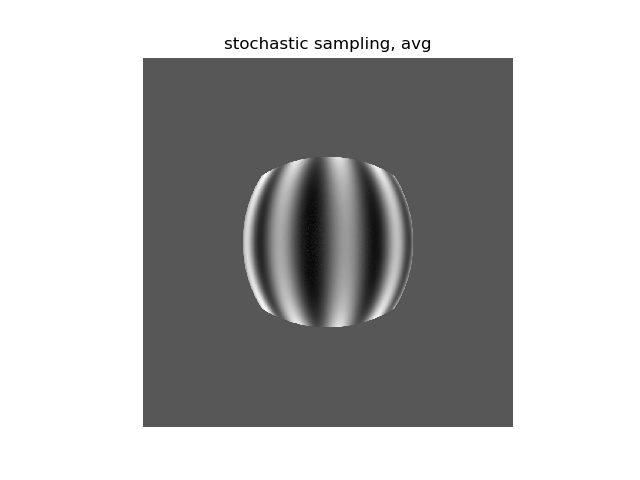

In [38]:
plt.figure()
#plt.subplot(131)
plt.imshow((OMR_snell_stochastic+OMR_snell_stochastic2+OMR_snell_stochastic3+\
            OMR_snell_stochastic4+OMR_snell_stochastic5)/5,cmap='gray',interpolation='none')
plt.title('stochastic sampling, avg')
plt.axis('off')
plt.savefig('stoachstic_downsample_avg.png')
saveimu16('stoachstic_downsample_avg.tif',(OMR_snell_stochastic+OMR_snell_stochastic2+OMR_snell_stochastic3+\
            OMR_snell_stochastic4+OMR_snell_stochastic5)/5)
# plt.subplot(132)
# plt.imshow(OMR_snell_up,cmap='gray',interpolation='none')
# plt.title('stochastic sampling')
# plt.axis('off')
# plt.subplot(133)
# plt.imshow(OMR_snell,cmap='gray',interpolation='none')
# plt.title('normal sampling')
# plt.axis('off')
# plt.tight_layout()

# Go backwards

In [10]:
#display.init_inverse_transform()
display_stochastic.init_inverse_transform()
display_stochastic2.init_inverse_transform()
display_stochastic3.init_inverse_transform()
display_stochastic4.init_inverse_transform()
display_stochastic5.init_inverse_transform()

In [15]:
#display_super.init_inverse_transform()

In [11]:
check_air = tifffile.imread('examples/example_check_inwindow.tif')
check_air_up = rescale(check_air,(2,2))
check_air_up = np.concatenate((check_air_up,np.zeros((1,7998))),axis=0)
check_air_up = np.concatenate((check_air_up,np.zeros((7999,1))),axis=1)
#check_air = dsm(check_air,(4,4))[:-1,:-1]

/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [10]:
inverse = display.inverse_transform_image(check_air)
inverse_stochastic = display_stochastic.inverse_transform_image(check_air)

In [12]:
#inverse_ns = display.inverse_transform_image(check_air,smooth=False)
inverse_stochastic_ns = display_stochastic.inverse_transform_image(check_air,smooth=False)
inverse_stochastic_ns2 = display_stochastic2.inverse_transform_image(check_air,smooth=False)
inverse_stochastic_ns3 = display_stochastic3.inverse_transform_image(check_air,smooth=False)
inverse_stochastic_ns4 = display_stochastic4.inverse_transform_image(check_air,smooth=False)
inverse_stochastic_ns5 = display_stochastic5.inverse_transform_image(check_air,smooth=False)

/home/twd/Dropbox/snell/snell_tool/snell.py:366: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  input_im[source] += im[j,i]/len(source[0])


In [18]:
inverse_super = display_super.inverse_transform_image(check_air_up,smooth=False)

<IPython.core.display.Javascript object>


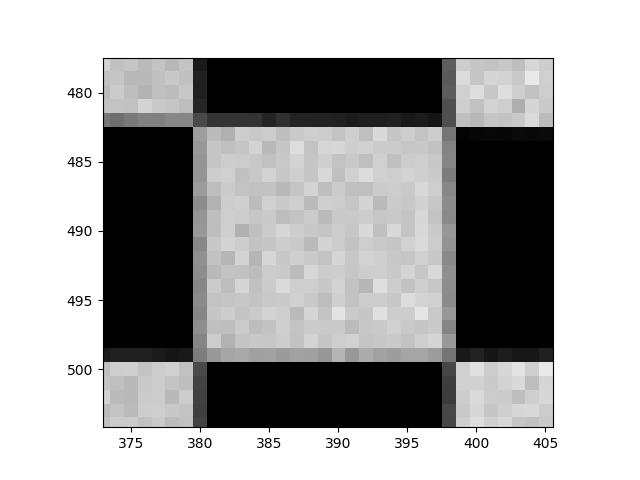

In [19]:
plt.figure()
plt.imshow(dsm(inverse_super,(8,8)),cmap='gray')

<IPython.core.display.Javascript object>


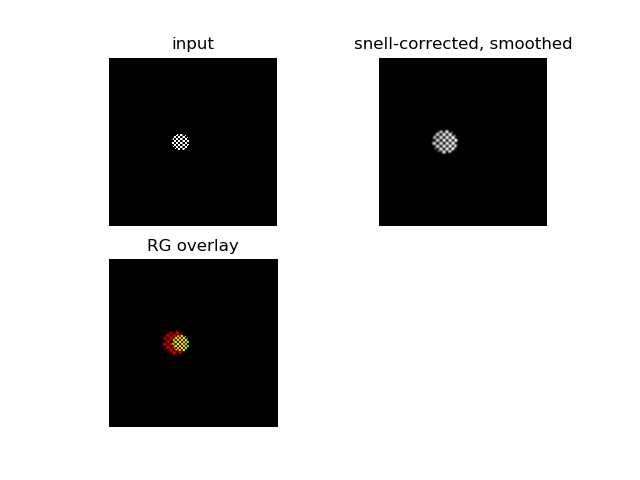

(-0.5, 998.5, 998.5, -0.5)

In [29]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse,cmap='gray',interpolation='none')
plt.title('snell-corrected, smoothed')
plt.axis('off')

rg = np.zeros((check_air.shape[0],check_air.shape[1],3))
rg[:,:,0] = inverse/np.max(inverse)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

<IPython.core.display.Javascript object>


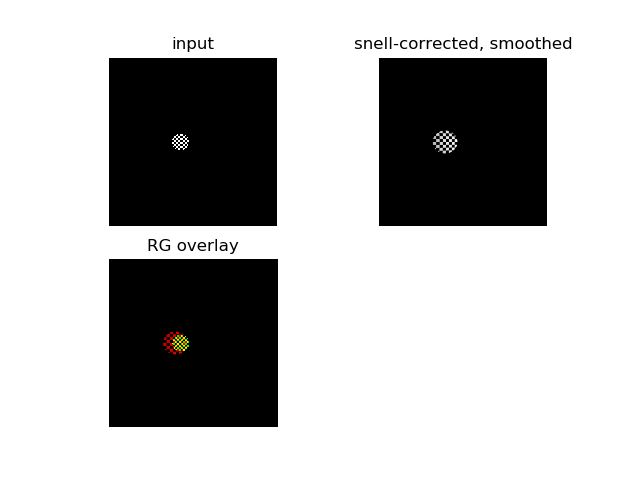

(-0.5, 3998.5, 3998.5, -0.5)

In [16]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse_stochastic,cmap='gray',interpolation='none')
plt.title('snell-corrected, smoothed')
plt.axis('off')

rg = np.zeros((check_air.shape[0],check_air.shape[1],3))
rg[:,:,0] = inverse_stochastic/np.max(inverse_stochastic)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

<IPython.core.display.Javascript object>


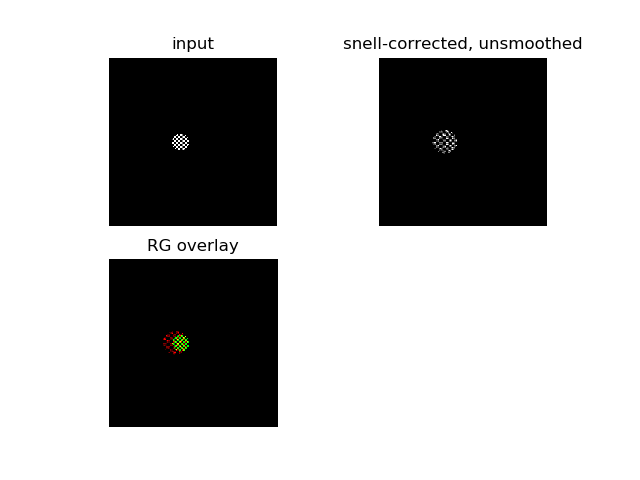

(-0.5, 998.5, 998.5, -0.5)

In [31]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse_ns,cmap='gray',interpolation='none')
plt.title('snell-corrected, unsmoothed')
plt.axis('off')

rg = np.zeros((check_air.shape[0],check_air.shape[1],3))
rg[:,:,0] = inverse_ns/np.max(inverse_ns)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

In [37]:
def saveimu16(fn,arr):
    imageio.imwrite(fn,(65000*(arr-np.min(arr))/(np.max(arr)-np.min(arr))).astype('uint16'))

In [32]:
imsave = dsm((inverse_stochastic_ns+inverse_stochastic_ns2 + inverse_stochastic_ns3 + \
               inverse_stochastic_ns4 + inverse_stochastic_ns5)/5,(4,4))
imsave = (imsave-np.min(imsave))/(np.max(imsave)-np.min(imsave))

In [36]:
import imageio
imageio.imwrite('stochastic_downsample_avg_inverse.tif',
                (65000*imsave).astype('uint16'))

<IPython.core.display.Javascript object>


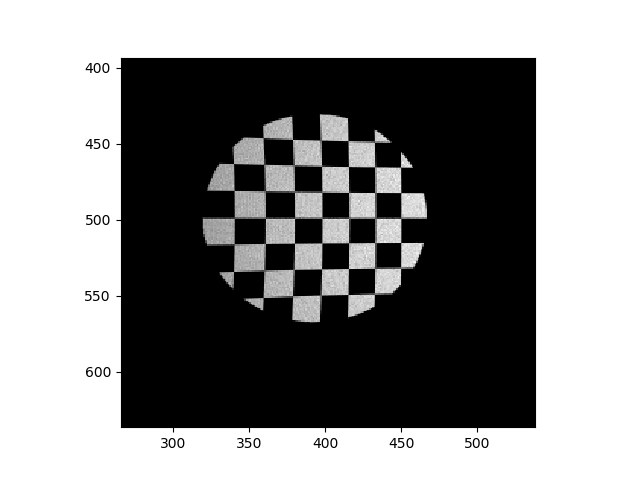

In [26]:
plt.figure()
# plt.subplot(221)
# plt.imshow(dsm(check_air,(4,4)),cmap='gray',interpolation='none')
# plt.title('input')
# plt.axis('off')
# plt.subplot(222)
plt.imshow(dsm((inverse_stochastic_ns+inverse_stochastic_ns2 + inverse_stochastic_ns3 + \
               inverse_stochastic_ns4 + inverse_stochastic_ns5)/5,(4,4)),
           cmap='gray',interpolation='none')
plt.savefig('stochastic_downsample_avg_inverse.png')
tifffile.imsave('stochastic_downsample_avg_inverse.tif',
                dsm((inverse_stochastic_ns+inverse_stochastic_ns2 + inverse_stochastic_ns3 + \
               inverse_stochastic_ns4 + inverse_stochastic_ns5)/5,(4,4)))
# plt.axis('off')

# rg = np.zeros((check_air.shape[0],check_air.shape[1],3))
# rg[:,:,0] = inverse_stochastic_ns/np.max(inverse_ns)
# rg[:,:,1] = check_air/np.max(check_air)

# plt.subplot(223)
# plt.imshow(rg,cmap='gray',interpolation='none')
# plt.title('RG overlay')
# plt.axis('off')

# Go forward from the inverse

In [16]:
im_ = dsm((inverse_stochastic_ns+inverse_stochastic_ns2 + inverse_stochastic_ns3 + \
               inverse_stochastic_ns4 + inverse_stochastic_ns5)/5,(4,4))
im_r = rescale(im_,(4,4))

/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/twd/anaconda3/envs/keras2.2.2/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [17]:
forward = display_stochastic.transform_image(im_r[:-1,:-1],smooth=False,downsample=4)

<IPython.core.display.Javascript object>


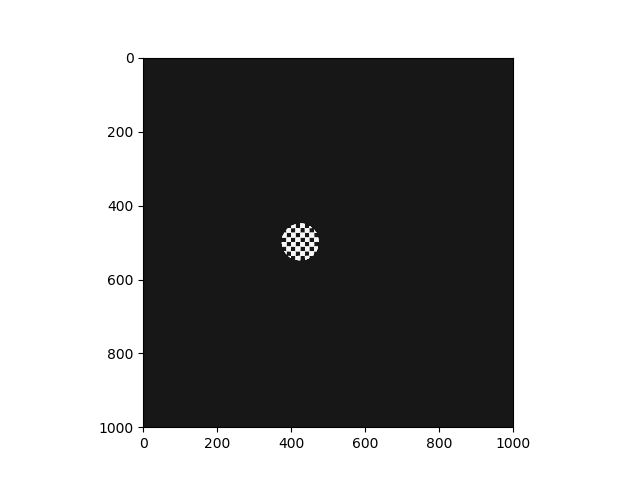

In [39]:
plt.figure()
plt.imshow(forward,cmap='gray')
plt.savefig('stochastic_downsample_avg_inverse_forward.png')
saveimu16('stochastic_downsample_avg_inverse_forward.tif',forward)

In [20]:
ds_air = dsm(check_air,(4,4))

In [21]:
rg = np.zeros((forward.shape[0],forward.shape[1],3))
rg[:,:,0] = forward/np.max(forward)
rg[:,:,1] = ds_air/np.max(ds_air)

In [1]:
np.mean(np.abs(rg[:,:,0]-rg[:,:,1]))/np.mean(rg[:,:,1])

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


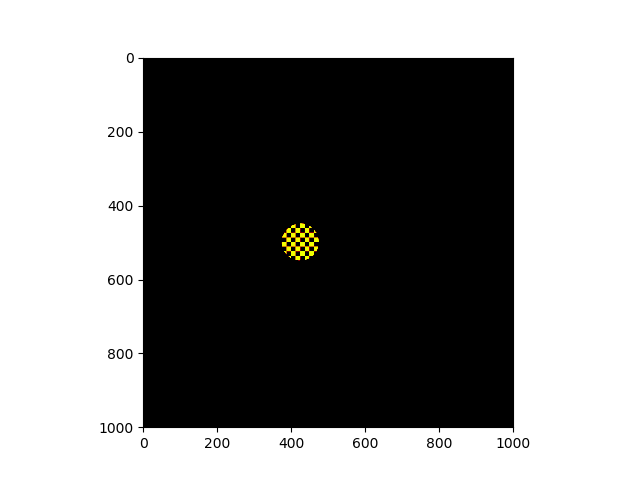

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [40]:
plt.figure()
plt.imshow(rg)
plt.savefig('stochastic_downsample_avg_inverse_forward_overlay.png')
saveimu16('stochastic_downsample_avg_inverse_forward_overlay.tif',rg)